# Paso 1 – Reorganizar y limpiar datos

Este notebook realiza la limpieza, transformación y preparación del dataset de trámites de la plataforma *Mi Argentina*.  
Se documenta cada paso para que quede claro cómo se generó el dataset limpio listo para análisis matemático.


## 1️. Carga de datos
Se carga el CSV original descargado de datos.gob.ar.

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carga de datasets con la codificación correcta
df = pd.read_csv('../../processed/lista-tramites-vigentes-total-procesado.csv', encoding='latin1')

# Muestra las primeras filas para verificar
print("Method head()" ,df.head())


Method head()    id_tramite                                     nombre_tramite  \
0         425  NICar - Registros, Renovaciones y Otras Operac...   
1         430     SIPRO Inscripción Proveedor  Persona Jurídica   
2         431  SIPRO Actualización Proveedor  Agrupación de ...   
3         432  SIPRO Inscripción Proveedor  Agrupación de Co...   
4         433  SIPRO Inscripción Proveedor  Cooperativas, Mu...   

                       organo_rector fecha_publicacion_produccion  \
0         Secretaría Legal y Técnica                   2016-06-15   
1  Jefatura de Gabinete de Ministros                   2016-07-07   
2  Jefatura de Gabinete de Ministros                   2016-07-07   
3  Jefatura de Gabinete de Ministros                   2016-07-07   
4  Jefatura de Gabinete de Ministros                   2016-07-07   

  marca_arancelado                                     link_de_acceso  \
0       ARANCELADO  https://tramitesadistancia.gob.ar/tramitesadis...   
1    NO ARANCELA

In [218]:
# Información básica
print("Method info()", df.info())
# Estadísticas básicas de columnas numéricas
print("Method describe()", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id_tramite                    2515 non-null   int64 
 1   nombre_tramite                2515 non-null   object
 2   organo_rector                 2515 non-null   object
 3   fecha_publicacion_produccion  2515 non-null   object
 4   marca_arancelado              2515 non-null   object
 5   link_de_acceso                2515 non-null   object
 6   validador_identidad           2515 non-null   object
dtypes: int64(1), object(6)
memory usage: 137.7+ KB
Method info() None
Method describe()         id_tramite
count  2515.000000
mean   3440.431014
std    1831.372316
min     425.000000
25%    1869.000000
50%    2690.000000
75%    5336.500000
max    6103.000000


## 2️. Limpieza básica y tipo de datos

- Convertimos fechas a tipo datetime.
- Eliminamos filas con fechas inválidas.
- Eliminamos duplicados por `id_tramite`.


In [219]:
# Convertir fechas
df['fecha_publicacion_produccion'] = pd.to_datetime(df['fecha_publicacion_produccion'], errors='coerce')

# Eliminar filas con fechas inválidas
df = df.dropna(subset=['fecha_publicacion_produccion'])

# Eliminar duplicados
df = df.drop_duplicates(subset=['id_tramite'])

# Ver información general
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id_tramite                    2515 non-null   int64         
 1   nombre_tramite                2515 non-null   object        
 2   organo_rector                 2515 non-null   object        
 3   fecha_publicacion_produccion  2515 non-null   datetime64[ns]
 4   marca_arancelado              2515 non-null   object        
 5   link_de_acceso                2515 non-null   object        
 6   validador_identidad           2515 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 137.7+ KB


## 3️. Columnas de tiempo

Se extraen columnas auxiliares para análisis temporal y visualizaciones:

- `anio`, `mes`, `trimestre`, `dia`, `dia_semana`.

In [220]:
df['anio'] = df['fecha_publicacion_produccion'].dt.year
df['mes'] = df['fecha_publicacion_produccion'].dt.month
df['trimestre'] = df['fecha_publicacion_produccion'].dt.quarter
df['dia'] = df['fecha_publicacion_produccion'].dt.day
df['dia_semana'] = df['fecha_publicacion_produccion'].dt.day_name()

df.head(15)

,id_tramite,nombre_tramite,organo_rector,fecha_publicacion_produccion,marca_arancelado,link_de_acceso,validador_identidad,anio,mes,trimestre,dia,dia_semana
0,425,"NICar - Registros, Renovaciones y Otras Operac...",Secretaría Legal y Técnica,2016-06-15,ARANCELADO,https://tramitesadistancia.gob.ar/tramitesadis...,NIC-AFIP,2016,6,2,15,Wednesday
1,430,SIPRO Inscripción Proveedor  Persona Jurídica,Jefatura de Gabinete de Ministros,2016-07-07,NO ARANCELADO,https://tramitesadistancia.gob.ar/tramitesadis...,"Mi argentina,AFIP",2016,7,3,7,Thursday
2,431,SIPRO Actualización Proveedor  Agrupación de ...,Jefatura de Gabinete de Ministros,2016-07-07,NO ARANCELADO,https://tramitesadistancia.gob.ar/tramitesadis...,"Mi argentina,AFIP",2016,7,3,7,Thursday
3,432,SIPRO Inscripción Proveedor  Agrupación de Co...,Jefatura de Gabinete de Ministros,2016-07-07,NO ARANCELADO,https://tramitesadistancia.gob.ar/tramitesadis...,"Mi argentina,AFIP",2016,7,3,7,Thursday
4,433,"SIPRO Inscripción Proveedor  Cooperativas, Mu...",Jefatura de Gabinete de Ministros,2016-07-07,NO ARANCELADO,https://tramitesadistancia.gob.ar/tramitesadis...,"Mi argentina,AFIP",2016,7,3,7,Thursday
5,434,SIPRO - Actualizacion Proveedor - Persona Humana,Jefatura de Gabinete de Ministros,2016-07-07,NO ARANCELADO,https://tramitesadistancia.gob.ar/tramitesadis...,"Mi argentina,AFIP",2016,7,3,7,Thursday
6,435,SIPRO Actualización Proveedor  Persona Jurídica,Jefatura de Gabinete de Ministros,2016-07-07,NO ARANCELADO,https://tramitesadistancia.gob.ar/tramitesadis...,"Mi argentina,AFIP",2016,7,3,7,Thursday
7,436,"SIPRO Actualización Proveedor  Cooperativas, ...",Jefatura de Gabinete de Ministros,2016-07-07,NO ARANCELADO,https://tramitesadistancia.gob.ar/tramitesadis...,"Mi argentina,AFIP",2016,7,3,7,Thursday
8,447,Certificado de Vigencia de Matrículas,Ministerio de Justicia,2016-08-22,ARANCELADO,https://tramitesadistancia.gob.ar/tramitesadis...,"Mi argentina,AFIP",2016,8,3,22,Monday
9,448,URGENTE Certificado de Vigencia de Matrículas,Ministerio de Justicia,2016-08-22,ARANCELADO,https://tramitesadistancia.gob.ar/tramitesadis...,"Mi argentina,AFIP",2016,8,3,22,Monday


## 4️. Columna `marca_arancelado` → booleano

Se convierte a columna booleana para análisis agregados y filtros rápidos:

- `True` → Arancelado
- `False` → No Arancelado


In [221]:
# Realiza la asignación para guardar el cambio
df['marca_arancelado'] = df['marca_arancelado'].map({'ARANCELADO': True, 'NO ARANCELADO': False})

## 5️. Columna `validador_identidad` → listas y columnas booleanas

Pasos realizados:

1. Convertir strings separados por comas en listas.
2. Limpiar espacios y eliminar elementos vacíos.
3. Reemplazar listas vacías con `['sin validador']`.
4. Generar columnas booleanas para validadores más frecuentes: `AFIP`, `Mi Argentina`, `ANSES`, `DNI`, `NIC-AFIP`.
5. Crear dataset "exploded" para análisis granular.


In [222]:
# 1. Convertir strings a listas
df['validador_identidad'] = df['validador_identidad'].str.split(',')

# 2. Limpiar espacios y eliminar elementos vacíos
df['validador_identidad'] = df['validador_identidad'].apply(lambda x: [v.strip() for v in x if isinstance(x, list) and v.strip() != ''])

# 3. Reemplazar listas vacías con "sin validador"
df['validador_identidad'] = df['validador_identidad'].apply(lambda x: ['sin validador'] if not x else x)

# 4. Columnas booleanas para validadores frecuentes
validadores_frecuentes = ['AFIP', 'Mi argentina', 'ANSES', 'DNI', 'NIC-AFIP']
for v in validadores_frecuentes:
    df[f'valida_{v.replace(" ", "_")}'] = df['validador_identidad'].apply(lambda x: v in x)

# 5. Dataset "exploded" (opcional para análisis granular)
df_exploded = df.explode('validador_identidad')


In [223]:
### ✅ Conteos de validadores

from collections import Counter
# Contar frecuencia de validadores
todos_los_validadores = [v for sublist in df['validador_identidad'] for v in sublist]
contador_validadores = Counter(todos_los_validadores)
contador_validadores.most_common()


[('AFIP', 2506),
 ('Mi argentina', 2284),
 ('ANSES', 151),
 ('DNI', 148),
 ('NIC-AFIP', 8),
 ('BORA', 1)]

In [224]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id_tramite                    2515 non-null   int64         
 1   nombre_tramite                2515 non-null   object        
 2   organo_rector                 2515 non-null   object        
 3   fecha_publicacion_produccion  2515 non-null   datetime64[ns]
 4   marca_arancelado              2515 non-null   bool          
 5   link_de_acceso                2515 non-null   object        
 6   validador_identidad           2515 non-null   object        
 7   anio                          2515 non-null   int32         
 8   mes                           2515 non-null   int32         
 9   trimestre                     2515 non-null   int32         
 10  dia                           2515 non-null   int32         
 11  dia_semana                    

,id_tramite,nombre_tramite,organo_rector,fecha_publicacion_produccion,marca_arancelado,link_de_acceso,validador_identidad,anio,mes,trimestre,dia,dia_semana,valida_AFIP,valida_Mi_argentina,valida_ANSES,valida_DNI,valida_NIC-AFIP
0,425,"NICar - Registros, Renovaciones y Otras Operac...",Secretaría Legal y Técnica,2016-06-15,True,https://tramitesadistancia.gob.ar/tramitesadis...,[NIC-AFIP],2016,6,2,15,Wednesday,False,False,False,False,True
1,430,SIPRO Inscripción Proveedor  Persona Jurídica,Jefatura de Gabinete de Ministros,2016-07-07,False,https://tramitesadistancia.gob.ar/tramitesadis...,"[Mi argentina, AFIP]",2016,7,3,7,Thursday,True,True,False,False,False
2,431,SIPRO Actualización Proveedor  Agrupación de ...,Jefatura de Gabinete de Ministros,2016-07-07,False,https://tramitesadistancia.gob.ar/tramitesadis...,"[Mi argentina, AFIP]",2016,7,3,7,Thursday,True,True,False,False,False
3,432,SIPRO Inscripción Proveedor  Agrupación de Co...,Jefatura de Gabinete de Ministros,2016-07-07,False,https://tramitesadistancia.gob.ar/tramitesadis...,"[Mi argentina, AFIP]",2016,7,3,7,Thursday,True,True,False,False,False
4,433,"SIPRO Inscripción Proveedor  Cooperativas, Mu...",Jefatura de Gabinete de Ministros,2016-07-07,False,https://tramitesadistancia.gob.ar/tramitesadis...,"[Mi argentina, AFIP]",2016,7,3,7,Thursday,True,True,False,False,False
5,434,SIPRO - Actualizacion Proveedor - Persona Humana,Jefatura de Gabinete de Ministros,2016-07-07,False,https://tramitesadistancia.gob.ar/tramitesadis...,"[Mi argentina, AFIP]",2016,7,3,7,Thursday,True,True,False,False,False
6,435,SIPRO Actualización Proveedor  Persona Jurídica,Jefatura de Gabinete de Ministros,2016-07-07,False,https://tramitesadistancia.gob.ar/tramitesadis...,"[Mi argentina, AFIP]",2016,7,3,7,Thursday,True,True,False,False,False
7,436,"SIPRO Actualización Proveedor  Cooperativas, ...",Jefatura de Gabinete de Ministros,2016-07-07,False,https://tramitesadistancia.gob.ar/tramitesadis...,"[Mi argentina, AFIP]",2016,7,3,7,Thursday,True,True,False,False,False
8,447,Certificado de Vigencia de Matrículas,Ministerio de Justicia,2016-08-22,True,https://tramitesadistancia.gob.ar/tramitesadis...,"[Mi argentina, AFIP]",2016,8,3,22,Monday,True,True,False,False,False
9,448,URGENTE Certificado de Vigencia de Matrículas,Ministerio de Justicia,2016-08-22,True,https://tramitesadistancia.gob.ar/tramitesadis...,"[Mi argentina, AFIP]",2016,8,3,22,Monday,True,True,False,False,False


In [225]:
# df_processed es el DataFrame que contiene todos los cambios
df_processed = df.copy() # o cualquier nombre que uses para tu df procesado

# Guarda el DataFrame en un nuevo archivo CSV en la carpeta 'processed'
df_processed.to_csv('../processed/df_procesado.csv', index=False)

# Paso 1 – Cierre: Serie temporal acumulada de trámites

En esta sección se construye una **serie temporal acumulada** de trámites digitalizados.  
Esta serie será la base para el análisis matemático (funciones, derivadas e integrales) y visualización en el Paso 2.



## 1️. Agrupar por fecha y contar nuevos trámites

Se cuenta la cantidad de trámites publicados en cada fecha.


In [226]:
# Agrupar por fecha y contar cantidad de trámites publicados por día
tramites_por_fecha = df.groupby('fecha_publicacion_produccion').size().rename("tramites_diarios")

# Crear serie acumulada de trámites
tramites_acumulados = tramites_por_fecha.cumsum()

# Convertir a DataFrame para trabajar y guardar
df_acumulados = tramites_acumulados.reset_index()
df_acumulados.rename(columns={'fecha_publicacion_produccion': 'fecha'}, inplace=True)

# Guardar CSV listo para análisis y visualización
#df_acumulados.to_csv('data/processed/tramites_acumulados.csv', index=False)

# Mostrar primeras filas
df_acumulados.head()

,fecha,tramites_diarios
0,2016-06-15,1
1,2016-07-07,8
2,2016-08-22,14
3,2016-09-01,15
4,2016-09-09,16


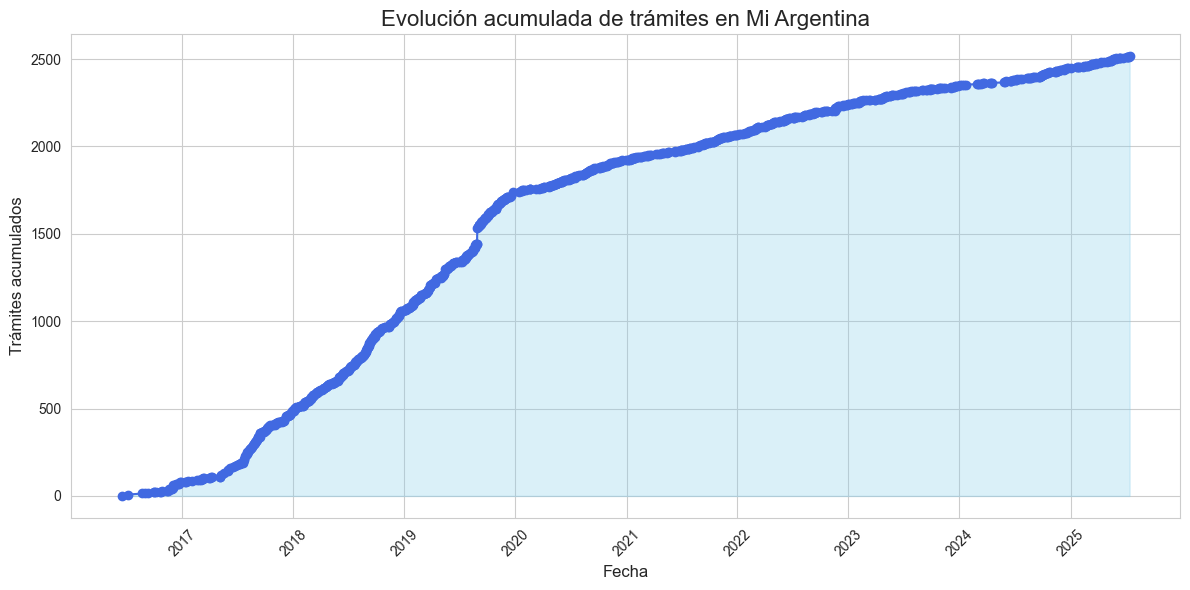

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

plt.plot(df_acumulados['fecha'], df_acumulados['tramites_diarios'], marker='o', linestyle='-', color='royalblue')
plt.fill_between(df_acumulados['fecha'], df_acumulados['tramites_diarios'], color='skyblue', alpha=0.3)

plt.title("Evolución acumulada de trámites en Mi Argentina", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Trámites acumulados", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
